In [10]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial.distance import hamming


In [11]:
class Hopfield:
    def __init__(self, n):
        self.n = n
        self.states = np.random.choice([-1, 1], n)
        self.biases = np.random.uniform(-1, 1, n)
        self.weights = np.random.uniform(-1, 1, (n, n)) * np.tri(n, n, -1)
        self.weights = self.weights + self.weights.T
        
    def update(self):
        x = np.random.randint(0, self.n)
        deltaE = self.checkEnergyChange(x)
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # deltaEHard = Eafter - Ebefore
        
        # print(f"delta E: {deltaE}")
        # print(f"deltaEHard: {deltaEHard}")
        if deltaE < 0:
            self.states[x] *= -1
                
    # def checkSpecificEnergy(self, x):
    #     return -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
            
    def checkEnergyChange(self, x):
        # Ebefore = self.biases[x] * self.states[x]
        # for i in range(len(self.states)):
        #     Ebefore += self.weights[i][x] * self.states[i] * self.states[x]
        # Eafter = self.biases[x] * self.states[x] * -1
        # for i in range(len(self.states)):
        #     Eafter += self.weights[i][x] * self.states[i] * self.states[x] * -1
        # return Eafter - Ebefore
        
        Ebefore = -(1/2) * self.states[x] * self.weights[x] @ self.states + self.biases[x] * self.states[x]
        Eafter = -(1/2) * -self.states[x] * self.weights[x] @ self.states + self.biases[x] * -self.states[x]
        
        # Ebefore = self.checkEnergy()
        # self.states[x] *= -1
        # Eafter = self.checkEnergy()
        # self.states[x] *= -1
        return Eafter - Ebefore
    
    def hasConverged(self):
        for i in range(len(self.states)):
            deltaE = self.checkEnergyChange(i)
            if deltaE < 0:
                return False
        return True
    
    def checkEnergy(self):
        # E = 0
        # for i in range(len(self.states)):
        #     for j in range(len(self.states)):
        #         E += self.weights[i][j] * self.states[i] * self.states[j]
        # E = E * 1/2
        # for i in range(len(self.states)):
        #     E += self.biases[i] * self.states[i]
        # return E
        return -(1/2) * self.states.T @ self.weights @ self.states + self.biases @ self.states 
    
    def printState(self):
        print(self.states)
    
    def setState(self, state):
        self.states = state
        
    def setStateFromString(self, string):
        for i in range(len(string)):
            if string[i] == '0':
                self.states[i] = -1
            else:
                self.states[i] = 1
                
    def setWeightsFromString(self, strings): # this needs to store -1 and 1, not 0 and 1
        # self.weights = np.zeros((self.n, self.n))
        # for i in range(len(strings)):
        #     v = np.array(list(strings[i]), dtype=int)
        #     self.weights = self.weights + np.outer(v, v.T)
        # self.weights = self.weights / len(strings)
        strings = [np.array(list(string), dtype=int) for string in strings]
        imgs = np.array([st.flatten() for st in strings])
        imgs = [x * 2 - 1 for x in imgs]
        self.weights = (1/len(strings)) * sum([np.outer(st, st) for st in imgs])
                
    def stateAsImage(self):
        return self.states.reshape(int(np.sqrt(self.n)), int(np.sqrt(self.n)))
    
    def runUntilConverge(self):
        while(not self.hasConverged()):
            self.update()
            print(self.checkEnergy())
            
    def outputString(self):
        tmep = (self.states + 1) / 2
        tmep = np.array(tmep, dtype=int)
        tmep = np.array(tmep, dtype=str)
        return "".join(tmep)
    
    def UpdateNeuron(self, neuron):
        deltaE = self.checkEnergyChange(neuron)
        if deltaE < 0:
            self.states[neuron] *= -1

In [12]:
h = Hopfield(100)
h.printState()
print(h.checkEnergy())
while(not h.hasConverged()):
    h.update()
    # h.printState()
    print(h.checkEnergy())

[ 1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1
  1  1  1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1
 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1
  1  1 -1 -1]
16.099584793123448
16.099584793123448
15.404991568305057
-2.6863303540882546
-2.6863303540882546
-13.292153888184282
-13.292153888184282
-27.556021668825345
-27.556021668825345
-42.219731551836944
-42.219731551836944
-44.26631230970236
-50.4930195180882
-59.64883217642332
-71.3984407835323
-88.15114910143424
-88.15114910143424
-88.15114910143424
-88.15114910143424
-88.15114910143424
-88.15114910143424
-90.28659779969145
-90.28659779969145
-90.28659779969145
-90.28659779969145
-98.93926965942578
-98.93926965942578
-101.07524039635325
-101.07524039635325
-101.07524039635325
-101.07524039635325
-101.27598337584571
-101.27598337584571
-108.49434921545146
-108.49434921545146
-108.4943492154

In [13]:
n = 100
runs = []
for h in tqdm(range(10)):
    Es = []
    h = Hopfield(n)
    count = 0
    while(not h.hasConverged()):
        h.update()
        count = count + 1
        if (count == n):
            Es.append(h.checkEnergy())
            count = 0
    runs.append(Es)

100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


6
9
5
10
11
5
15
11
10
6


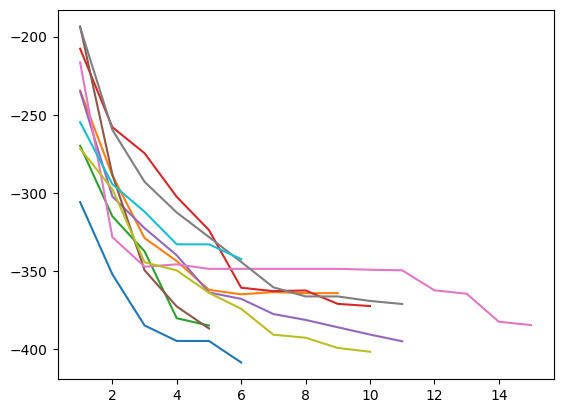

In [14]:
fig, ax = plt.subplots()

for i in range(len(runs)):
    print(len(runs[i]))
    ax.plot(np.linspace(1, len(runs[i]), len(runs[i])), runs[i])

In [15]:
# prove monotonically decreasing
for i in range(len(runs)):
    change =  np.array(runs[i][1:]) - np.array(runs[i][:-1])
    for j in change:
        if j > 0:
            print("problem:")
            print(j)

problem:
1.4028053052200562
problem:
0.43361755890970244
problem:
1.494875239071689


In [16]:
frown = "0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001"
frownCorrupted = "0000000000000000000000000000000000000000000010000000000000000001110000001000100001000001101000000001"
tree = "0001111000000111100000001100000000110000001111111000001100100000110000000011000000001100000000110000"

In [17]:
def messUpString(uh, k):
    # places = np.random.randint(0, len(uh), k)
    places = np.random.choice(range(len(uh)), k, replace=False)
    bs = np.array(list(uh), dtype=int)
    mask = np.zeros_like(bs)
    mask[places] = 1
    temp = bs + mask
    temp = [a % 2 for a in temp]
    out = ""
    for i in temp:
        out = out + str(i)
    return out


0000000000000100010000000000000000000000000010000000000000000001110000001000100001000001101000000001


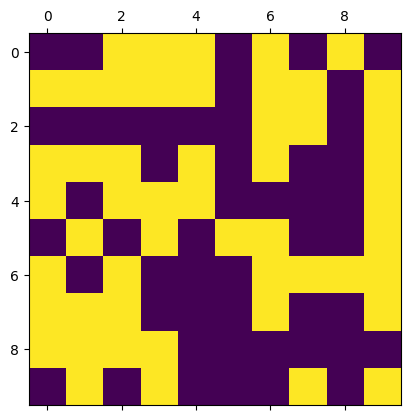

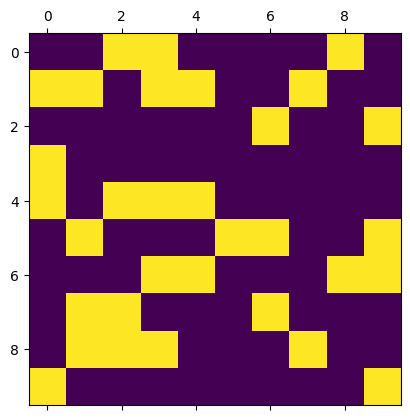

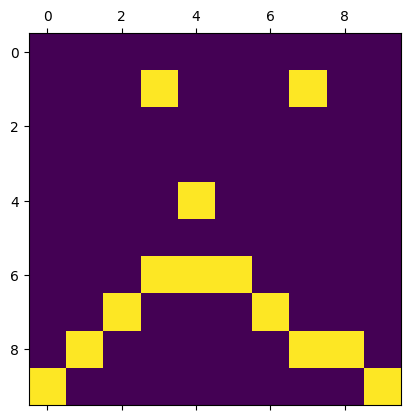

In [18]:
muckedUpFrown = messUpString(frown, 50)
muckedUpTree = messUpString(tree, 10)
h = Hopfield(100)
h.setWeightsFromString([frown])
h.setStateFromString(muckedUpFrown)
# plt.matshow(h.weights)
plt.matshow(h.stateAsImage())
h.biases = np.ones(100)
for i in range(80):
    h.update()
plt.matshow(h.stateAsImage())
while(not h.hasConverged()):
    h.update()
    # print(h.checkEnergy())
# for i in range(len(h.weights)):
#     print(h.weights[i])
plt.matshow(h.stateAsImage())
print(h.outputString())

In [19]:
def GenerateMemories(k):
    out = []
    for i in range(k):
        nums = np.random.choice(["0", "1"], (100))
        st = "".join(nums)
        out.append(st)
    return out
GenerateMemories(3)

['0110100010101001010111100110001111101100110010001000000101111000011111000000110100001001000110010011',
 '0011111110000110111001100011000101000010011010001010010101010100001101101001101001000011010001110011',
 '0010000101011010101100000000100011111111011101101010111001101110011110011001111101110100100000000111']

In [47]:
p_max = 100
k_max = 60
storage = np.zeros((p_max, k_max))
tries = 5
perfectMemories = GenerateMemories(p_max)
for p in tqdm(range(1, p_max)):
    usefulMemories = perfectMemories[:p]
    for k in range(k_max):
        
        # print(perfectMemories)
        # messedUpMemories = []
        for i in range(tries):
            memidx = np.random.randint(0, p)
            h = Hopfield(100)
            h.setWeightsFromString(usefulMemories)
            mess = messUpString(usefulMemories[memidx], k)
            h.setStateFromString(mess)
            while(not h.hasConverged()):
                for j in range(100):
                    h.update()
            # print(perfectMemories[i])
            # print(h.outputString())
            storage[p, k] += hamming(list(usefulMemories[memidx]), list(h.outputString()))
            # messedUpMemories.append()
        storage[p, k]
        
print(storage)
    

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [20:07<00:00, 12.20s/it]

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 5.   5.   5.  ]
 [0.   0.   0.   ... 5.   4.46 4.54]
 ...
 [0.85 0.81 0.77 ... 2.83 2.77 2.62]
 [0.82 0.81 0.79 ... 2.61 2.67 2.97]
 [0.89 0.93 0.94 ... 2.73 2.75 2.95]]


(0.5, 99.5)

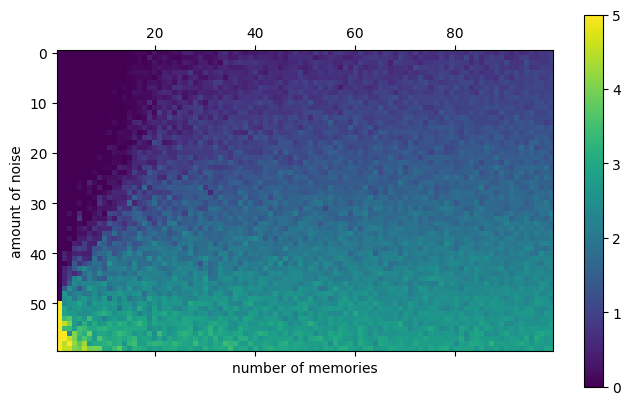

In [48]:
plt.matshow(storage.T)
plt.xlabel("number of memories")
plt.ylabel("amount of noise")
plt.colorbar()
plt.xlim(0.5, 99.5)

In [46]:
h = Hopfield(6)
print(h.biases)
memories = ["011001", "111000"]
things = set()
file = open("graphvix.txt", "w")
for i in tqdm(range(2**6)):
    b = bin(i)[2:].zfill(6)
    h.setWeightsFromString(memories)
    for j in range(len(h.states)):
        h.setStateFromString(b)
        h.UpdateNeuron(j)
        a = h.outputString()
        # print(b)
        # print(a)
        
        if not a == b:
            st = str(str(int(b,2)) + " -> " + str(int(a, 2)))
            if st not in things:
                things.add(st)
                file.write(st + "\n")
                print(st)
                # print(str(int(b,2)) + " -> " + str(int(a, 2)))

# for i in things:
#     print(i)

[ 0.37377996  0.69229498  0.58467682 -0.09602788 -0.91765106 -0.95323339]


  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:00<00:00, 714.74it/s]

0 -> 4
0 -> 2
0 -> 1
1 -> 5
1 -> 3
2 -> 6
2 -> 3
3 -> 7
4 -> 6
4 -> 5
5 -> 7
6 -> 7
8 -> 24
8 -> 9
9 -> 25
10 -> 2
10 -> 14
10 -> 11
11 -> 3
11 -> 15
12 -> 4
12 -> 14
12 -> 13
13 -> 5
13 -> 15
14 -> 6
14 -> 15
15 -> 7
16 -> 24
16 -> 17
17 -> 25
18 -> 2
18 -> 22
18 -> 19
19 -> 3
19 -> 23
20 -> 4
20 -> 22
20 -> 21
21 -> 5
21 -> 23
22 -> 6
22 -> 23
23 -> 7
24 -> 25
26 -> 24
26 -> 27
27 -> 25
28 -> 24
28 -> 29
29 -> 25
30 -> 14
30 -> 22
30 -> 31
31 -> 15
31 -> 23
32 -> 36
32 -> 34
33 -> 1
33 -> 37
33 -> 35
34 -> 38
35 -> 3
35 -> 39
36 -> 38
37 -> 5
37 -> 39
39 -> 7
40 -> 56
41 -> 9
41 -> 57
42 -> 34
42 -> 46
43 -> 11
43 -> 35
43 -> 47
44 -> 36
44 -> 46
45 -> 13
45 -> 37
45 -> 47
46 -> 38
47 -> 15
47 -> 39
48 -> 56
49 -> 17
49 -> 57
50 -> 34
50 -> 54
51 -> 19
51 -> 35
51 -> 55
52 -> 36
52 -> 54
53 -> 21
53 -> 37
53 -> 55
54 -> 38
55 -> 23
55 -> 39
57 -> 25
58 -> 56
59 -> 27
59 -> 57
60 -> 56
61 -> 29
61 -> 57
62 -> 46
62 -> 54
63 -> 31
63 -> 47
63 -> 55


In [88]:
z = 21
bin(z)[2:]

'10101'

In [118]:
test = list("00001111")
outtest = np.random.choice(test, 4, replace=False)
print(outtest)

['1' '1' '0' '0']


In [122]:
test2 = list("00001111")
hamming(test, test2)

0.0

In [30]:
test = set()
test.add("hello")

In [31]:

print(test)

{'hello'}
